In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report, confusion_matrix

In [220]:
df_BERT = pd.read_excel('BERTval.xlsx')
df_GPT = pd.read_excel('GPTval.xlsx')
df_Llama = pd.read_csv('LLAMAval.csv')

In [221]:
print(df_BERT.columns)
print(df_GPT.columns)
print(df_Llama.columns)

Index(['speech_content', 'speech_id_long', 'polarizing', 'populist',
       'extremist', 'neutral', 'Unnamed: 6', 'source_file', 'Raus/Umstritten',
       'Kommenrar', 'predicted_polarizing'],
      dtype='object')
Index(['speech_content', 'speech_id_long', 'polarizing', 'polarizing_40minift',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'cleaned_text'], dtype='object')


In [222]:
df_BERT.rename(columns={'predicted_polarizing': 'BERT'}, inplace=True)
df_GPT.rename(columns={'polarizing_40minift': 'GPT'}, inplace=True)
df_Llama.rename(columns={'cleaned_text': 'LLAMA'}, inplace=True)

In [223]:
df_BERT_GPT = df_BERT[['speech_id_long','speech_content', 'polarizing', 'BERT']].merge(df_GPT[['speech_id_long', 'GPT']], left_index=True, right_index=True)

In [224]:
df_merged = df_BERT_GPT.merge(df_Llama[['id', 'LLAMA']], left_index=True, right_index=True).drop(columns=['id', 'speech_id_long_y']).rename(columns={'speech_id_long_x': 'speech_id_long'})

In [225]:
df_merged['(2/3)'] = ((df_merged['BERT'] + df_merged['GPT'] + df_merged['LLAMA']) >= 2)

In [226]:
df_merged['(3/3)'] = ((df_merged['BERT'] + df_merged['GPT'] + df_merged['LLAMA']) == 3)

In [227]:
def eval_model(true_val, pred_val, label_name):
    global accuracy, precision, recall, f1, _, class_report
    accuracy = accuracy_score(true_val, pred_val)
    precision, recall, f1, _ = precision_recall_fscore_support(true_val, pred_val,
                                                               average='binary', zero_division=0)
    class_report = classification_report(true_val, pred_val, zero_division=0)
    print(f"{label_name} - Accuracy: {accuracy:.4f}")
    print(f"{label_name} - Precision: {precision:.4f}")
    print(f"{label_name} - Recall: {recall:.4f}")
    print(f"{label_name} - F1-Score: {f1:.4f}")
    print(f"\n{label_name} - Classification Report:\n{class_report}")

In [228]:
def conf_mat(label_name, true_val, pred_val):
    # Compute the confusion matrix
    cm = confusion_matrix(true_val, pred_val)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    
    # Labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(label_name)
    plt.show()

In [229]:
eval_model(df_merged['polarizing'], df_merged['BERT'], 'BERT')

BERT - Accuracy: 0.9433
BERT - Precision: 0.6932
BERT - Recall: 0.7957
BERT - F1-Score: 0.7409

BERT - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2027
           1       0.69      0.80      0.74       230

    accuracy                           0.94      2257
   macro avg       0.83      0.88      0.85      2257
weighted avg       0.95      0.94      0.94      2257



In [230]:
eval_model(df_merged['polarizing'], df_merged['GPT'], 'GPT')

GPT - Accuracy: 0.9521
GPT - Precision: 0.6993
GPT - Recall: 0.9304
GPT - F1-Score: 0.7985

GPT - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2027
           1       0.70      0.93      0.80       230

    accuracy                           0.95      2257
   macro avg       0.85      0.94      0.89      2257
weighted avg       0.96      0.95      0.96      2257



In [231]:
eval_model(df_merged['polarizing'], df_merged['LLAMA'], 'LLAMA')

LLAMA - Accuracy: 0.9397
LLAMA - Precision: 0.6546
LLAMA - Recall: 0.8652
LLAMA - F1-Score: 0.7453

LLAMA - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2027
           1       0.65      0.87      0.75       230

    accuracy                           0.94      2257
   macro avg       0.82      0.91      0.86      2257
weighted avg       0.95      0.94      0.94      2257



In [232]:
eval_model(df_merged['polarizing'], df_merged['(2/3)'], '(2/3)')

(2/3) - Accuracy: 0.9610
(2/3) - Precision: 0.7610
(2/3) - Recall: 0.9000
(2/3) - F1-Score: 0.8247

(2/3) - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2027
           1       0.76      0.90      0.82       230

    accuracy                           0.96      2257
   macro avg       0.87      0.93      0.90      2257
weighted avg       0.97      0.96      0.96      2257



In [233]:
eval_model(df_merged['polarizing'], df_merged['(3/3)'], '(3/3)')

(3/3) - Accuracy: 0.9579
(3/3) - Precision: 0.8426
(3/3) - Recall: 0.7217
(3/3) - F1-Score: 0.7775

(3/3) - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2027
           1       0.84      0.72      0.78       230

    accuracy                           0.96      2257
   macro avg       0.91      0.85      0.88      2257
weighted avg       0.96      0.96      0.96      2257



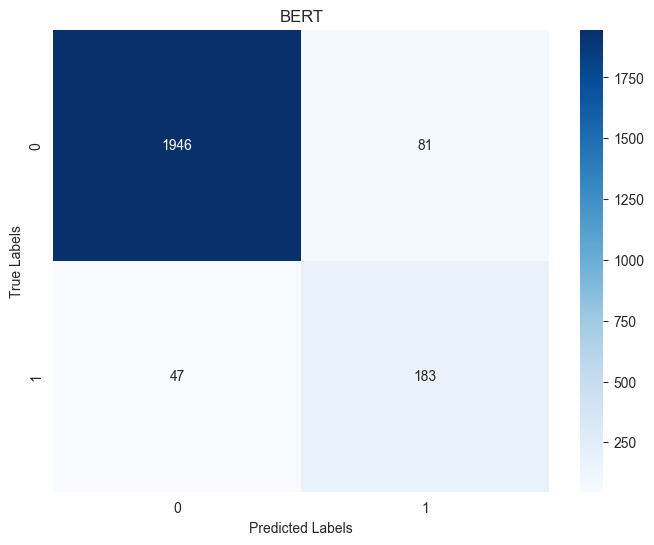

In [234]:
conf_mat('BERT', df_merged['polarizing'], df_merged['BERT'])

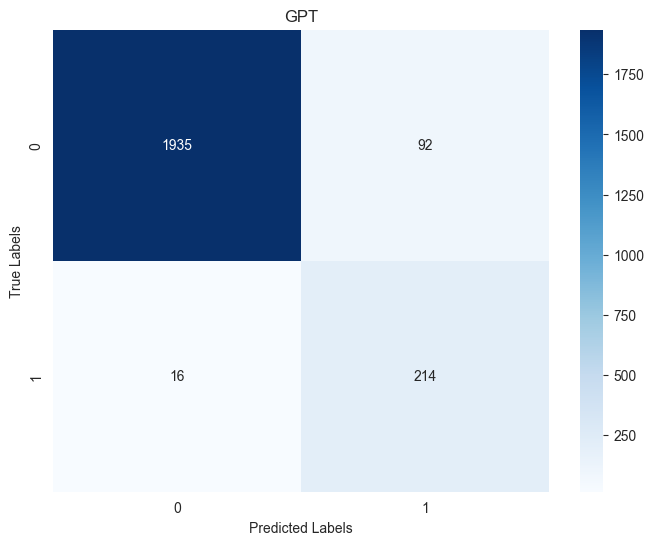

In [235]:
conf_mat('GPT', df_merged['polarizing'], df_merged['GPT'])

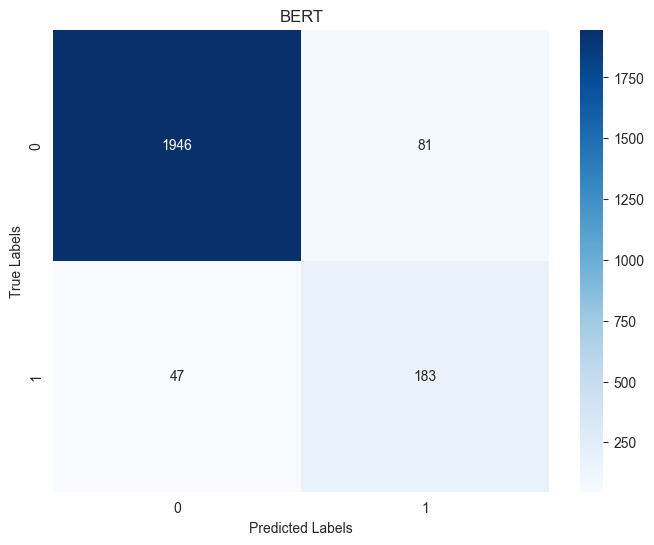

In [236]:
conf_mat('BERT', df_merged['polarizing'], df_merged['BERT'])

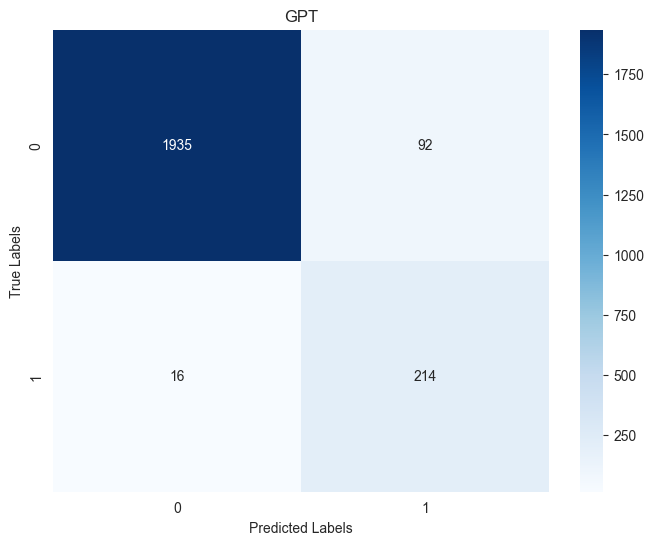

In [237]:
conf_mat('GPT', df_merged['polarizing'], df_merged['GPT'])

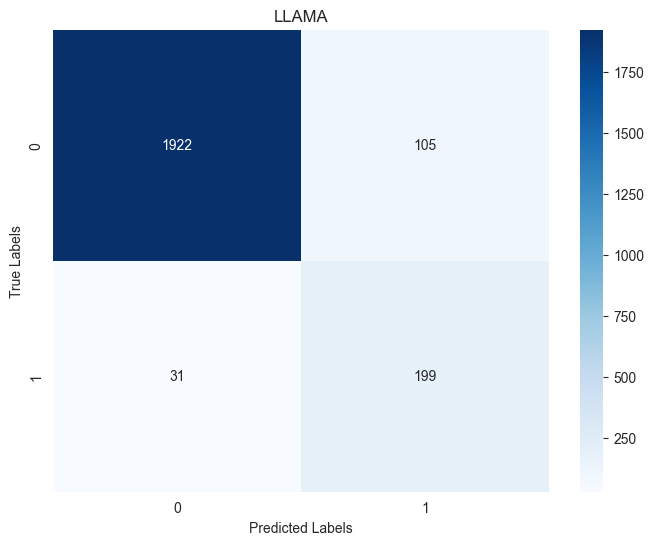

In [238]:
conf_mat('LLAMA', df_merged['polarizing'], df_merged['LLAMA'])

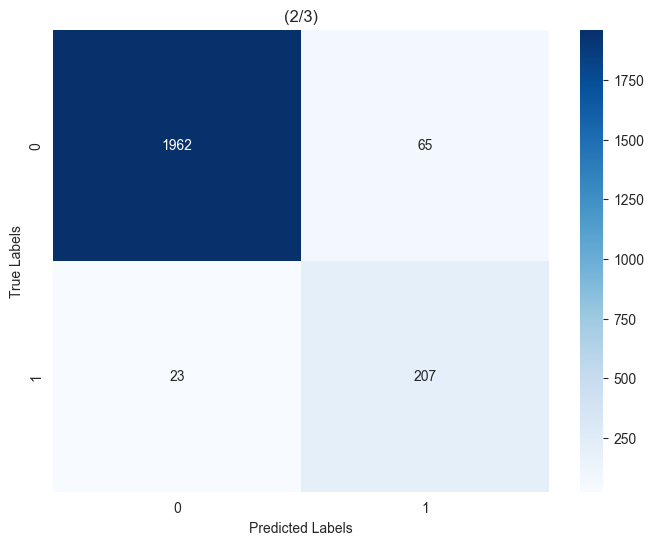

In [239]:
conf_mat('(2/3)', df_merged['polarizing'], df_merged['(2/3)'])

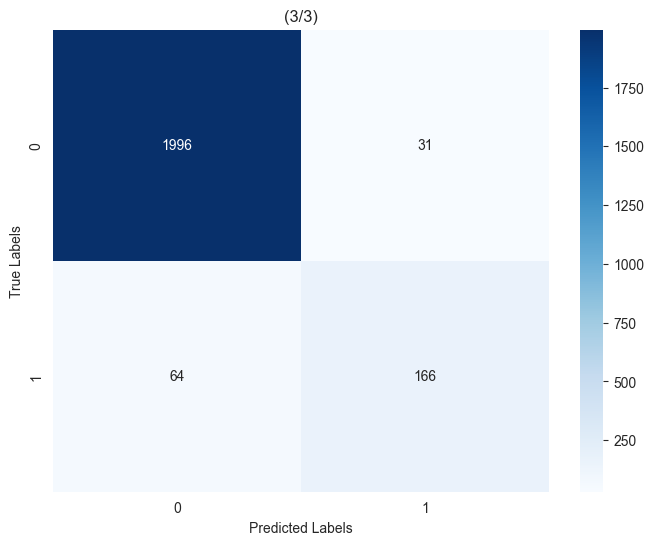

In [240]:
conf_mat('(3/3)', df_merged['polarizing'], df_merged['(3/3)'])

In [241]:
df_merged.to_csv('model_performance_comparison.csv')